### Task:
- Find a rural kirana store image from google
- Analyze the items in the store and their counts (have the green rectangle)
- Analayze the size of the store area, length/width/ height
- Analyze the density of the amount of items present
- Use OpenCV, pytorch or tensorflow



0: 448x640 3 chairs, 1 couch, 2 potted plants, 1 dining table, 52.4ms
Speed: 3.0ms preprocess, 52.4ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


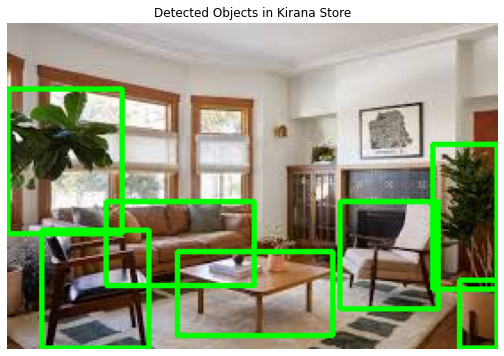

In [55]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

image_path = "livingroom2.jpg" 
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

model = YOLO("yolov8n.pt")  

results = model(image)

# bounding box
for result in results:
    for box in result.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box

#displaying:
plt.figure(figsize=(10,6))
plt.imshow(image)
plt.axis("off")
plt.title("Detected Objects in Kirana Store")
plt.show()

### Detecting the bottle pixel height first

In [35]:
results = model(image)

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  #Bounding Box

        #then checking if the box shows bottle through label
        class_id = int(box.cls[0]) 
        label = model.names[class_id]

        if label == "bottle":  
            bottle_pixel_height = y2 - y1  # Compute height in pixels
            print(f"Bottle Pixel Height: {bottle_pixel_height} pixels")


0: 416x640 1 person, 1 bottle, 74.3ms
Speed: 3.3ms preprocess, 74.3ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
Bottle Pixel Height: 133 pixels


In [36]:
#bottle pixel height found above:
bottle_pixel_height = 133
bottle_real_height = 0.3 # Meters

pixels_per_meter = bottle_pixel_height / bottle_real_height
print(pixels_per_meter)

443.33333333333337


In [39]:
store_width_pixels = 1400  # Example value
store_length_pixels = 900  # Example value

# width and length:
store_width_meters = store_width_pixels / pixels_per_meter
store_length_meters = store_length_pixels / pixels_per_meter

# Compute area
store_area = store_width_meters * store_length_meters

print(f"Estimated Store Width: {store_width_meters:.2f} meters")
print(f"Estimated Store Length: {store_length_meters:.2f} meters")
print(f"Estimated Store Area: {store_area:.2f} square meters")

Estimated Store Width: 3.16 meters
Estimated Store Length: 2.03 meters
Estimated Store Area: 6.41 square meters


In [40]:
results = model(image)

# Counting detected items
total_items = len(results[0].boxes)  
print(f"Total Detected Items: {total_items}")


0: 416x640 1 person, 1 bottle, 87.9ms
Speed: 5.5ms preprocess, 87.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
Total Detected Items: 2


In [41]:
item_density = total_items / store_area
print(f"Estimated Item Density: {item_density:.2f} items per square meter")

Estimated Item Density: 0.31 items per square meter


In [44]:
model = YOLO('yolov8n.pt') 
model.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou